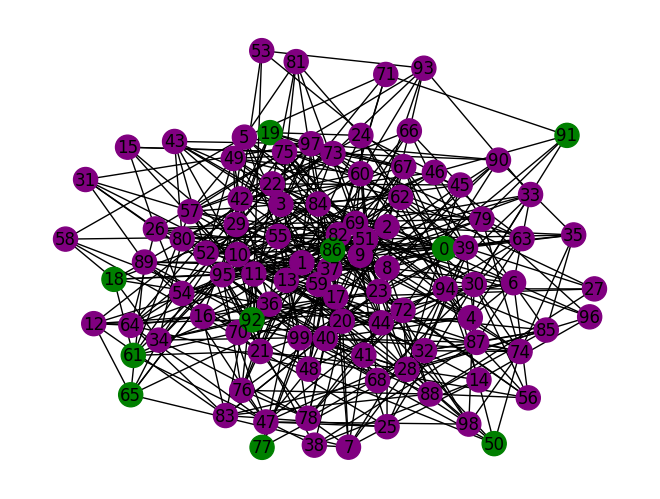

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def simulate_infection(num_nodes, infected_node):
    # Creamos un grafo aleatorio
    G = nx.erdos_renyi_graph(num_nodes, 0.1)

    # Inicializamos el estado de cada nodo
    states = {node: 'susceptible' for node in G.nodes()}
    states[infected_node] = 'infected'

    # Lista de nodos infectados
    infected_nodes = [infected_node]

    # Mientras haya nodos infectados
    while infected_nodes:
        # Escogemos un nodo infectado
        current_node = infected_nodes.pop(0)

        # Buscamos los vecinos susceptibles
        susceptible_neighbors = [n for n in G.neighbors(current_node) if states[n] == 'susceptible']

        # Infectamos a los vecinos susceptibles con cierta probabilidad
        for neighbor in susceptible_neighbors:
            if random.random() < 0.3:  # Probabilidad de infección
                states[neighbor] = 'infected'
                infected_nodes.append(neighbor)

    return states

def draw_graph(G, node_states):
    # Colores para los nodos
    node_colors = ['purple' if state == 'infected' else 'green' for state in node_states.values()]

    # Dibujamos el grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors)
    plt.show()

if __name__ == "__main__":
    num_nodes = 100
    infected_node = random.randint(0, num_nodes - 1)
    node_states = simulate_infection(num_nodes, infected_node)
    draw_graph(nx.erdos_renyi_graph(num_nodes, 0.1), node_states)